Repeat the same steps using a different classifier.

In [29]:
from sklearn.datasets import load_digits

In [30]:
digits = load_digits()
import pandas

df = pandas.DataFrame(digits.data)

In [31]:
# print labels of every 50th images in digits dataset
print(digits.target[::50])

[0 2 4 0 1 4 7 7 4 4 8 6 2 4 2 6 4 5 4 3 1 1 9 8 7 1 3 3 2 5 1 5 2 5 5 3]


In [32]:
# print the digits dataset shape
print(digits.images.shape)

(1797, 8, 8)


In [33]:
# print the image at index 20
print(digits.images[20])

[[ 0.  0.  3. 13. 11.  7.  0.  0.]
 [ 0.  0. 11. 16. 16. 16.  2.  0.]
 [ 0.  4. 16.  9.  1. 14.  2.  0.]
 [ 0.  4. 16.  0.  0. 16.  2.  0.]
 [ 0.  0. 16.  1.  0. 12.  8.  0.]
 [ 0.  0. 15.  9.  0. 13.  6.  0.]
 [ 0.  0.  9. 14.  9. 14.  1.  0.]
 [ 0.  0.  2. 12. 13.  4.  0.  0.]]


In [34]:
# print the label of image at index 20
print(digits.target[20])

0


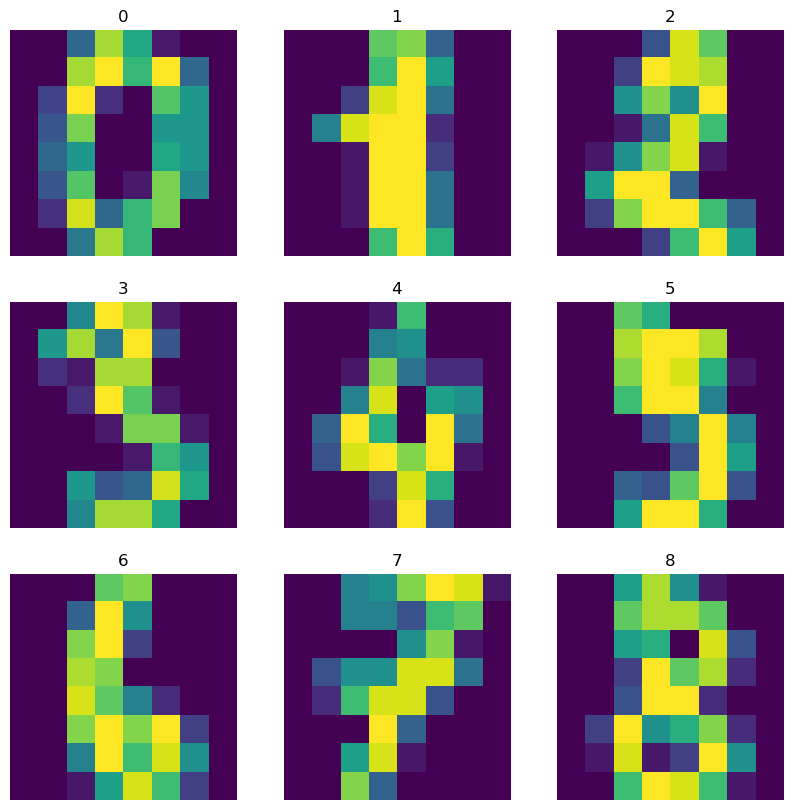

In [35]:
# use matplotlib.pyplot library to print 10 images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(0,10):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(digits.images[i].astype("uint8"))
    plt.title(digits.target[i])
    plt.axis("off")

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11, test_size=0.20)


In [37]:
# print the shape of train dataset
print(X_train.shape)

(1437, 64)


In [38]:
# print the shape of test dataset
print(X_test.shape)

(360, 64)


In [39]:
from sklearn.svm import SVC

In [40]:
svc = SVC()

In [41]:
svc.fit(X=X_train, y=y_train)

SVC()

In [42]:
predicted = svc.predict(X=X_test)

In [43]:
expected = y_test

In [44]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [45]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [46]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [47]:
wrong

[(5, 3), (9, 7), (7, 9), (7, 3), (8, 3)]

In [48]:
print(f'{svc.score(X_test, y_test):.2%}')

98.61%


In [71]:
import sklearn

In [73]:
# print the confusion matrix
confusion = sklearn.metrics.confusion_matrix(y_true=expected, y_pred=predicted)
print(confusion)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  1  0  1  1  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  1]
 [ 0  0  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0  1  0 36]]


In [54]:
from sklearn.metrics import classification_report

In [25]:
# print the classification report and compare the results with the KNN classifier.
names = [str(digit) for digit in digits.target_names]

print(classification_report(expected, predicted,
          target_names=names))